In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
#plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv('제주특별자치도_해양환경 연안 측정 데이터_20221120.csv')
df = df.dropna()
df.rename(columns={'수질평가지수(WQI)등급': '수질등급'}, inplace=True)
dummies = pd.get_dummies(df['날씨'], prefix='날씨').astype(int)

df = df.drop('날씨', axis=1)

df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['수층'], prefix='수층').astype(int)

df = df.drop('수층', axis=1)

df = pd.concat([df, dummies], axis=1)

df['측정 일자'] = pd.to_datetime(df['측정 일자'])
df['년'] = df['측정 일자'].dt.year.astype(int)
df['월'] = df['측정 일자'].dt.month.apply(lambda x: f'{x:02d}').astype(int)
df['일'] = df['측정 일자'].dt.day.apply(lambda x: f'{x:02d}').astype(int)
#df = df.drop(['측정 일자'],axis = 1)

df = df.drop(['측정 연도',	'측정 월','위도',	'경도'],axis = 1)

In [36]:
hanlim = df[df['정점명'].isin(['한림1', '한림2', '한림3'])].drop(['정점명'], axis=1)

In [37]:
hanlim

,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
6,2021-11-20,21.0,11.0,1,19.20,33.99,8.09,8.33,1.89,20.71,...,0.74,0,0,1,0,0,1,2021,11,20
7,2021-11-20,32.0,11.0,1,18.52,33.61,8.09,8.75,1.87,8.19,...,0.67,0,0,1,0,0,1,2021,11,20
8,2021-11-20,17.0,9.0,1,19.22,34.10,8.08,8.77,1.42,8.51,...,0.81,0,0,1,0,0,1,2021,11,20
15,2021-11-20,21.0,11.0,1,19.21,34.08,8.09,7.65,0.69,11.09,...,0.65,0,0,1,0,1,0,2021,11,20
16,2021-11-20,32.0,11.0,1,18.67,33.72,8.10,10.01,0.63,18.05,...,0.61,0,0,1,0,1,0,2021,11,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,2011-02-23,33.0,7.8,2,14.32,34.49,8.11,9.48,1.74,18.50,...,1.79,0,0,1,0,0,1,2011,2,23
1603,2011-02-23,45.0,8.3,1,14.50,34.46,8.10,9.45,1.66,25.20,...,1.04,0,0,1,0,0,1,2011,2,23
1609,2011-02-23,25.0,7.8,1,14.32,34.49,8.11,9.30,1.10,52.30,...,0.84,0,0,1,0,1,0,2011,2,23
1610,2011-02-23,33.0,7.8,2,14.17,34.49,8.10,9.53,1.50,32.10,...,0.61,0,0,1,0,1,0,2011,2,23


In [38]:
hanlim.columns

Index(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이', '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],
      dtype='object')

In [39]:
year_avg = hanlim.groupby('년')['수온'].mean()

year_avg

년
2011    18.673750
2012    17.745000
2013    18.850417
2014    18.055000
2015    19.149167
2016    17.915417
2017    18.641667
2018    17.683750
2019    19.082917
2020    18.942083
2021    19.020000
Name: 수온, dtype: float64

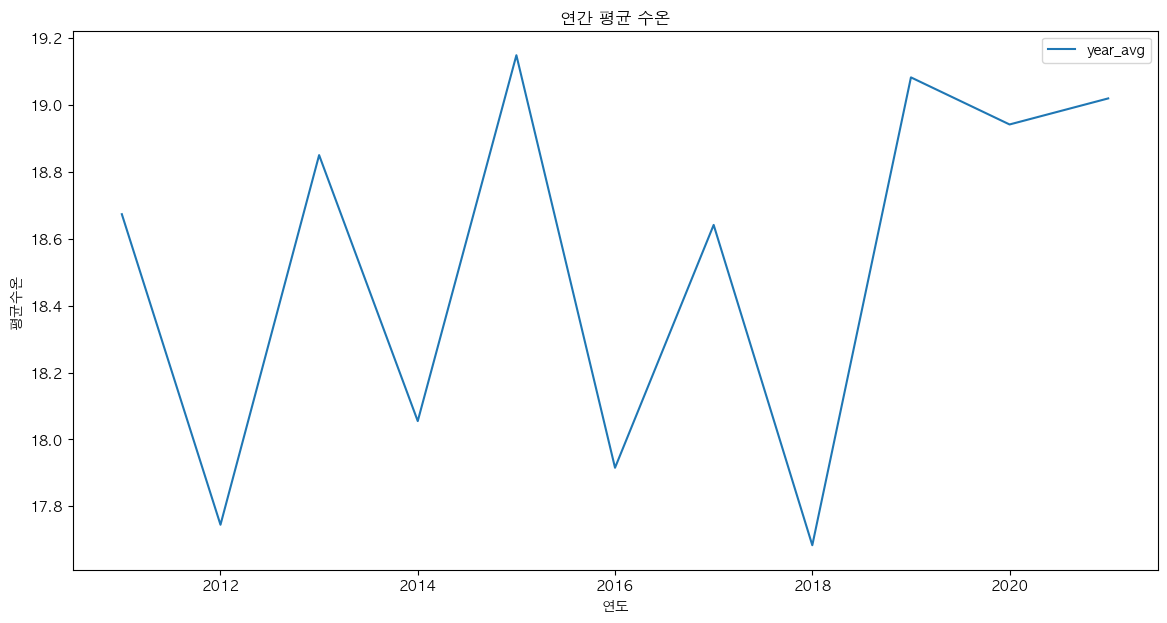

In [40]:
plt.figure(figsize=(14, 7))
plt.plot(year_avg, label='year_avg')
plt.title('연간 평균 수온')
plt.xlabel('연도')
plt.ylabel('평균수온')
plt.legend()
plt.show()

In [41]:
month_avg = hanlim.groupby(['년', '월'])['수온'].mean()

month_avg

년     월 
2011  2     14.358333
      5     15.316667
      8     23.425000
      11    21.595000
2012  2     14.160000
      5     17.063333
      8     22.011667
2013  2     14.015000
      5     16.070000
      8     25.346667
      11    19.970000
2014  2     14.481667
      5     17.426667
      8     21.785000
      11    18.526667
2015  2     13.958333
      5     16.318333
      8     25.260000
      11    21.060000
2016  2     13.921667
      5     16.183333
      8     21.903333
      11    19.653333
2017  2     14.541667
      5     16.276667
      8     22.480000
      11    21.268333
2018  2     13.935000
      5     16.488333
      8     20.343333
      11    19.968333
2019  2     15.256667
      5     16.350000
      8     23.330000
      11    21.395000
2020  2     15.013333
      5     16.256667
      8     24.541667
      11    19.956667
2021  2     15.138333
      5     17.025000
      8     24.910000
      11    19.006667
Name: 수온, dtype: float64

/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


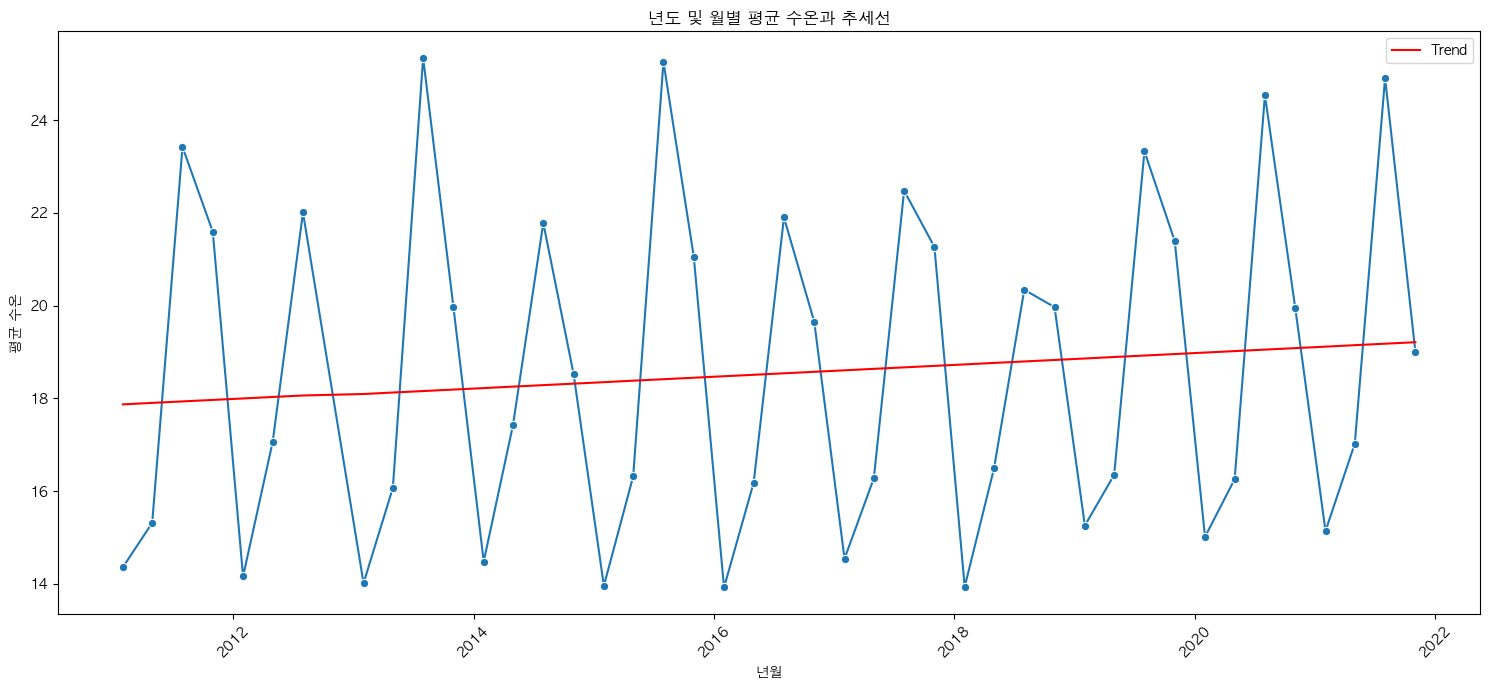

In [42]:
from sklearn.linear_model import LinearRegression

monthly_avg_temp_df = month_avg.reset_index()
monthly_avg_temp_df['년월'] = monthly_avg_temp_df['년'].astype(str) + '-' + monthly_avg_temp_df['월'].astype(str)
monthly_avg_temp_df['년월'] = pd.to_datetime(monthly_avg_temp_df['년월'])

# 선 그래프 그리기
plt.figure(figsize=(15, 7))
sns.lineplot(x='년월', y='수온', data=monthly_avg_temp_df, marker='o')

# 추세선 추가하기
# 날짜 데이터를 숫자로 변환 (LinearRegression을 위해)
X = np.array(monthly_avg_temp_df.index).reshape(-1, 1)
y = monthly_avg_temp_df['수온']

# 선형 회귀 모델 생성 및 학습
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 추세선 계산
trend = lin_reg.predict(X)

# 추세선 그리기
plt.plot(monthly_avg_temp_df['년월'], trend, label='Trend', color='red')

# 그래프 설정
plt.title('년도 및 월별 평균 수온과 추세선')
plt.xlabel('년월')
plt.ylabel('평균 수온')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
train_df = hanlim[hanlim['년'] < 2021].drop('측정 일자', axis = 1)

test_df = hanlim[hanlim['년'] == 2021].drop('측정 일자', axis = 1)

X_train = train_df.drop('수온', axis=1)
y_train = train_df['수온']

X_test = test_df.drop('수온', axis=1)
y_test = test_df['수온']



In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print("MAE : ", mae)


MAE :  0.36601249999999713


In [45]:
predictions

array([19.2095, 19.1244, 19.157 , 19.0582, 18.9775, 19.1999, 27.5981,
       25.3973, 27.2865, 24.6895, 21.6233, 24.4165, 16.797 , 17.6022,
       16.8746, 16.6125, 17.0285, 16.919 , 15.0901, 15.2178, 15.2124,
       15.1867, 15.2156, 15.2014])

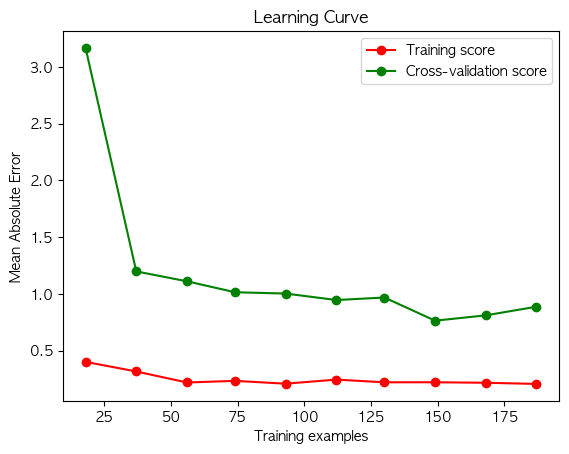

In [46]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(random_state=42), 
    X_train, 
    y_train, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10), 
    scoring='neg_mean_absolute_error'
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Mean Absolute Error")
plt.legend(loc="best")
plt.show()


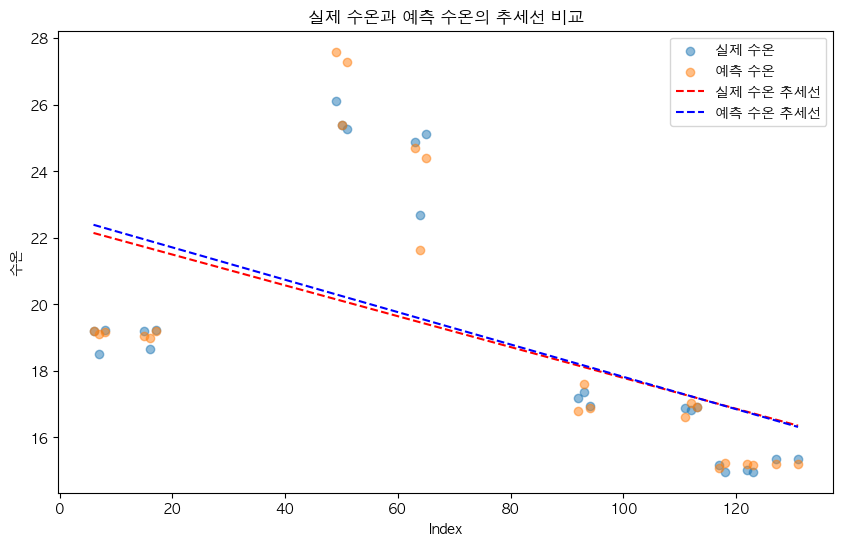

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# 실제 값에 대한 추세선 계산
z = np.polyfit(y_test.index, y_test, 1)
p = np.poly1d(z)

# 예측 값에 대한 추세선 계산
z_pred = np.polyfit(y_test.index, predictions, 1)
p_pred = np.poly1d(z_pred)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='실제 수온', alpha=0.5)
plt.scatter(y_test.index, predictions, label='예측 수온', alpha=0.5)

# 추세선 그리기
plt.plot(y_test.index, p(y_test.index), "r--", label='실제 수온 추세선')
plt.plot(y_test.index, p_pred(y_test.index), "b--", label='예측 수온 추세선')

plt.title('실제 수온과 예측 수온의 추세선 비교')
plt.xlabel('Index')
plt.ylabel('수온')
plt.legend()
plt.show()


In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
print("MAE : ", mae)

MAE :  2.8123333333333336


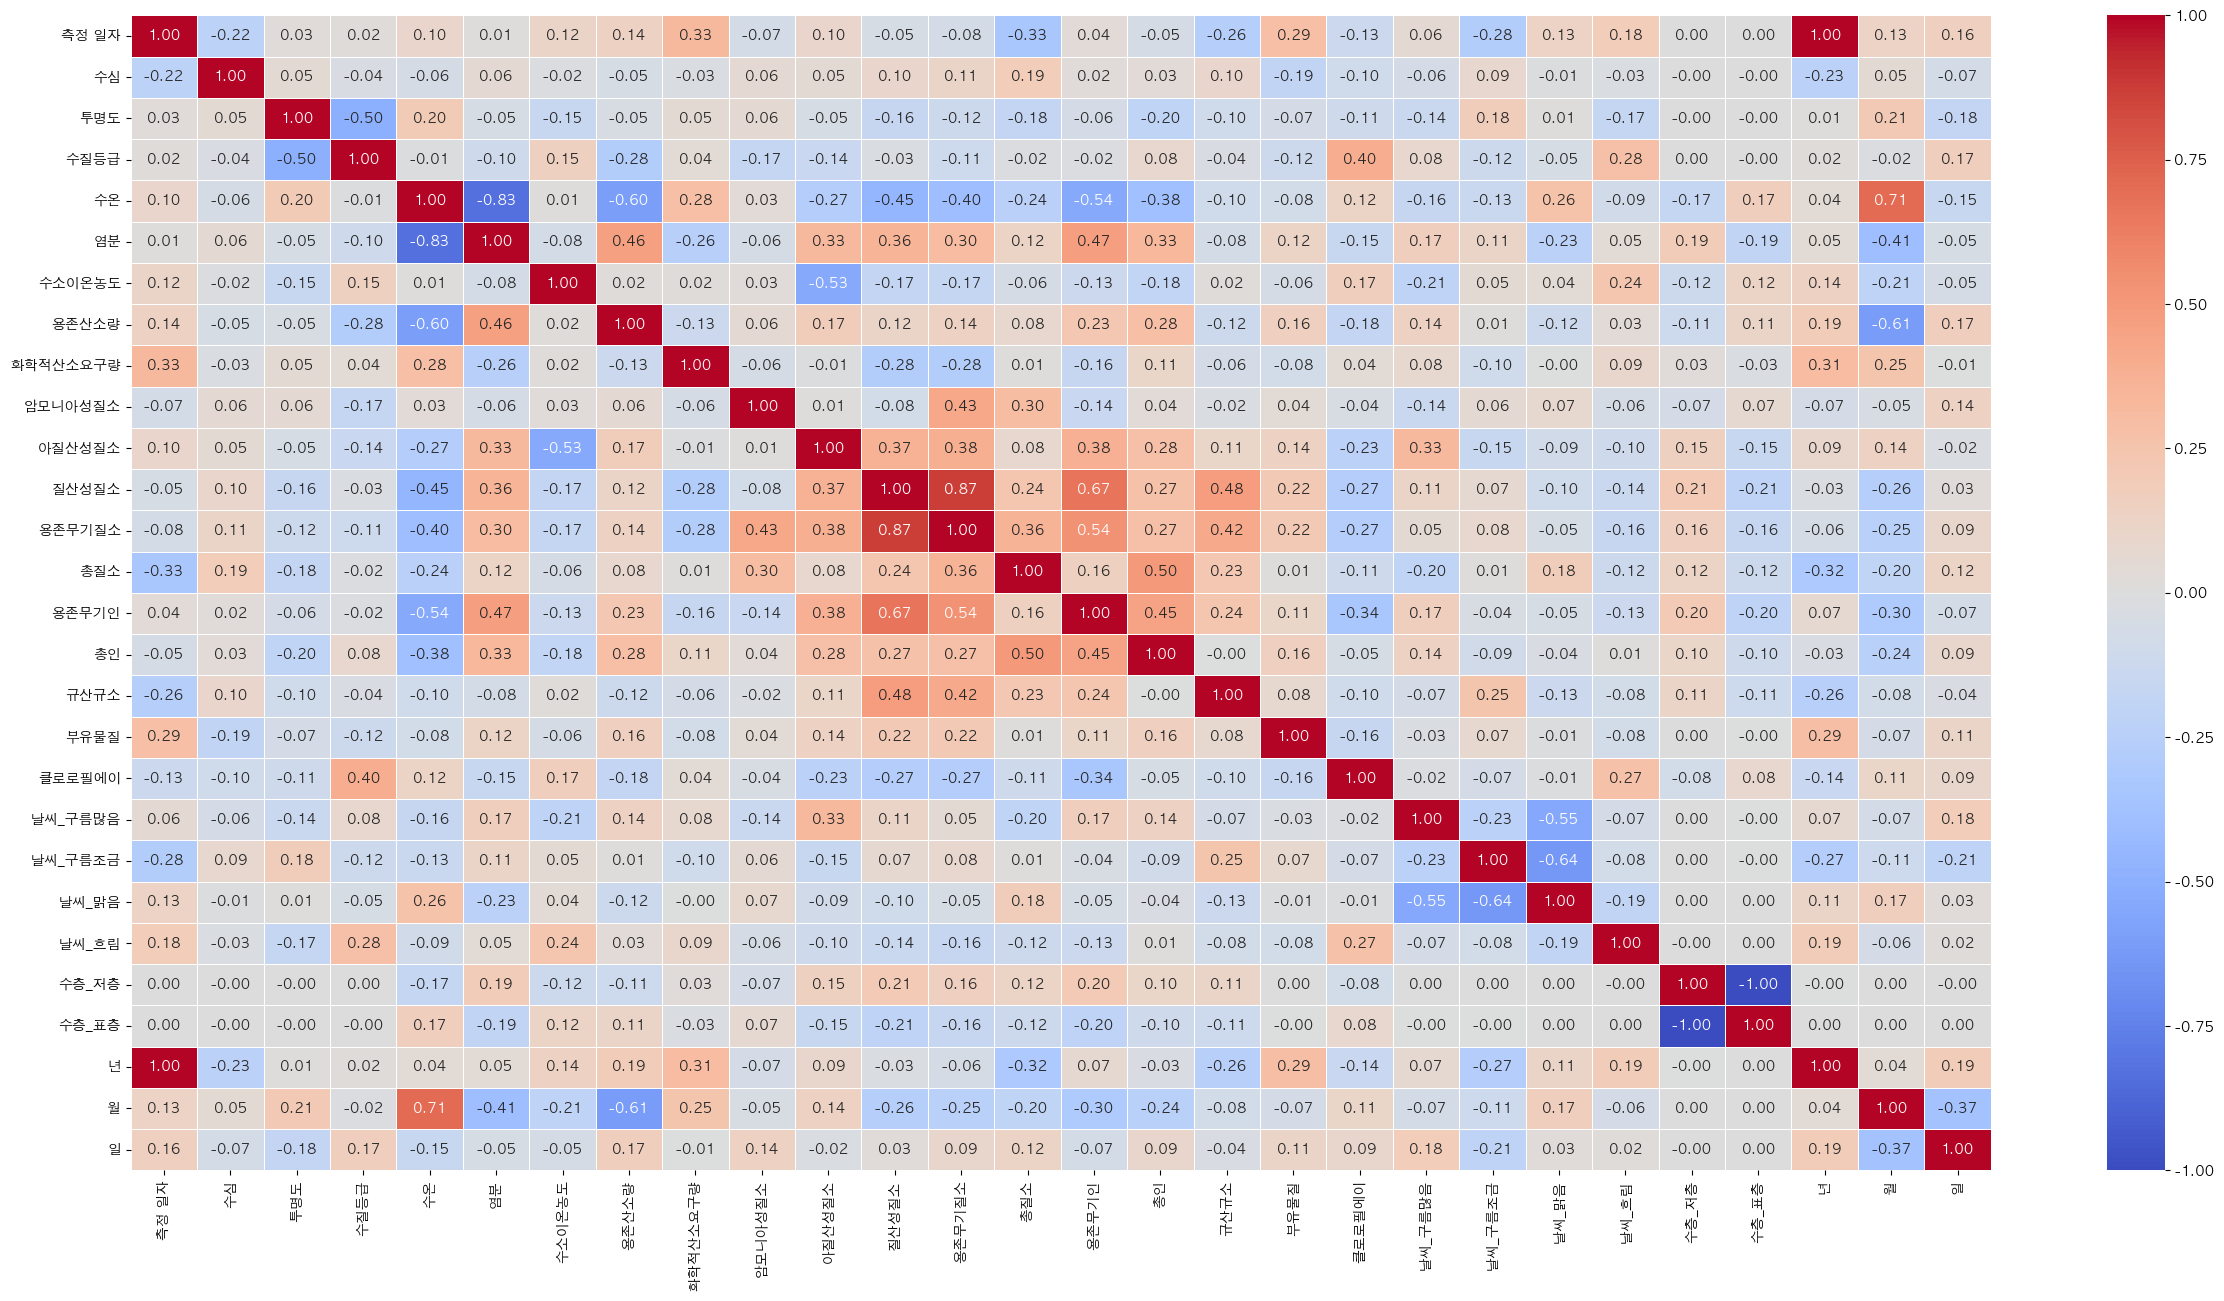

In [49]:
hanlimcorr = hanlim.corr()


plt.figure(figsize=(30, 15))
sns.heatmap(hanlimcorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [50]:
hanlim.corr

<bound method DataFrame.corr of           측정 일자    수심   투명도  수질등급     수온     염분  수소이온농도  용존산소량  화학적산소요구량  \
6    2021-11-20  21.0  11.0     1  19.20  33.99    8.09   8.33      1.89   
7    2021-11-20  32.0  11.0     1  18.52  33.61    8.09   8.75      1.87   
8    2021-11-20  17.0   9.0     1  19.22  34.10    8.08   8.77      1.42   
15   2021-11-20  21.0  11.0     1  19.21  34.08    8.09   7.65      0.69   
16   2021-11-20  32.0  11.0     1  18.67  33.72    8.10  10.01      0.63   
...         ...   ...   ...   ...    ...    ...     ...    ...       ...   
1602 2011-02-23  33.0   7.8     2  14.32  34.49    8.11   9.48      1.74   
1603 2011-02-23  45.0   8.3     1  14.50  34.46    8.10   9.45      1.66   
1609 2011-02-23  25.0   7.8     1  14.32  34.49    8.11   9.30      1.10   
1610 2011-02-23  33.0   7.8     2  14.17  34.49    8.10   9.53      1.50   
1611 2011-02-23  45.0   8.3     1  14.45  34.48    8.10   9.56      1.82   

      암모니아성질소  ...  클로로필에이  날씨_구름많음  날씨_구름조금  날씨_맑음  날씨

In [51]:
temp = hanlim.drop(['측정 일자', '수심', '투명도', '수질등급', '염분', '수소이온농도', '용존산소량',
       '화학적산소요구량', '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인',
       '총인', '규산규소', '부유물질', '클로로필에이', 
       '수층_저층', '수층_표층', '년', '일'],axis=1)

In [52]:
temp

,수온,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,월
6,19.20,0,0,1,0,11
7,18.52,0,0,1,0,11
8,19.22,0,0,1,0,11
15,19.21,0,0,1,0,11
16,18.67,0,0,1,0,11
...,...,...,...,...,...,...
1602,14.32,0,0,1,0,2
1603,14.50,0,0,1,0,2
1609,14.32,0,0,1,0,2
1610,14.17,0,0,1,0,2


In [53]:
tempcorrs=temp.corr()


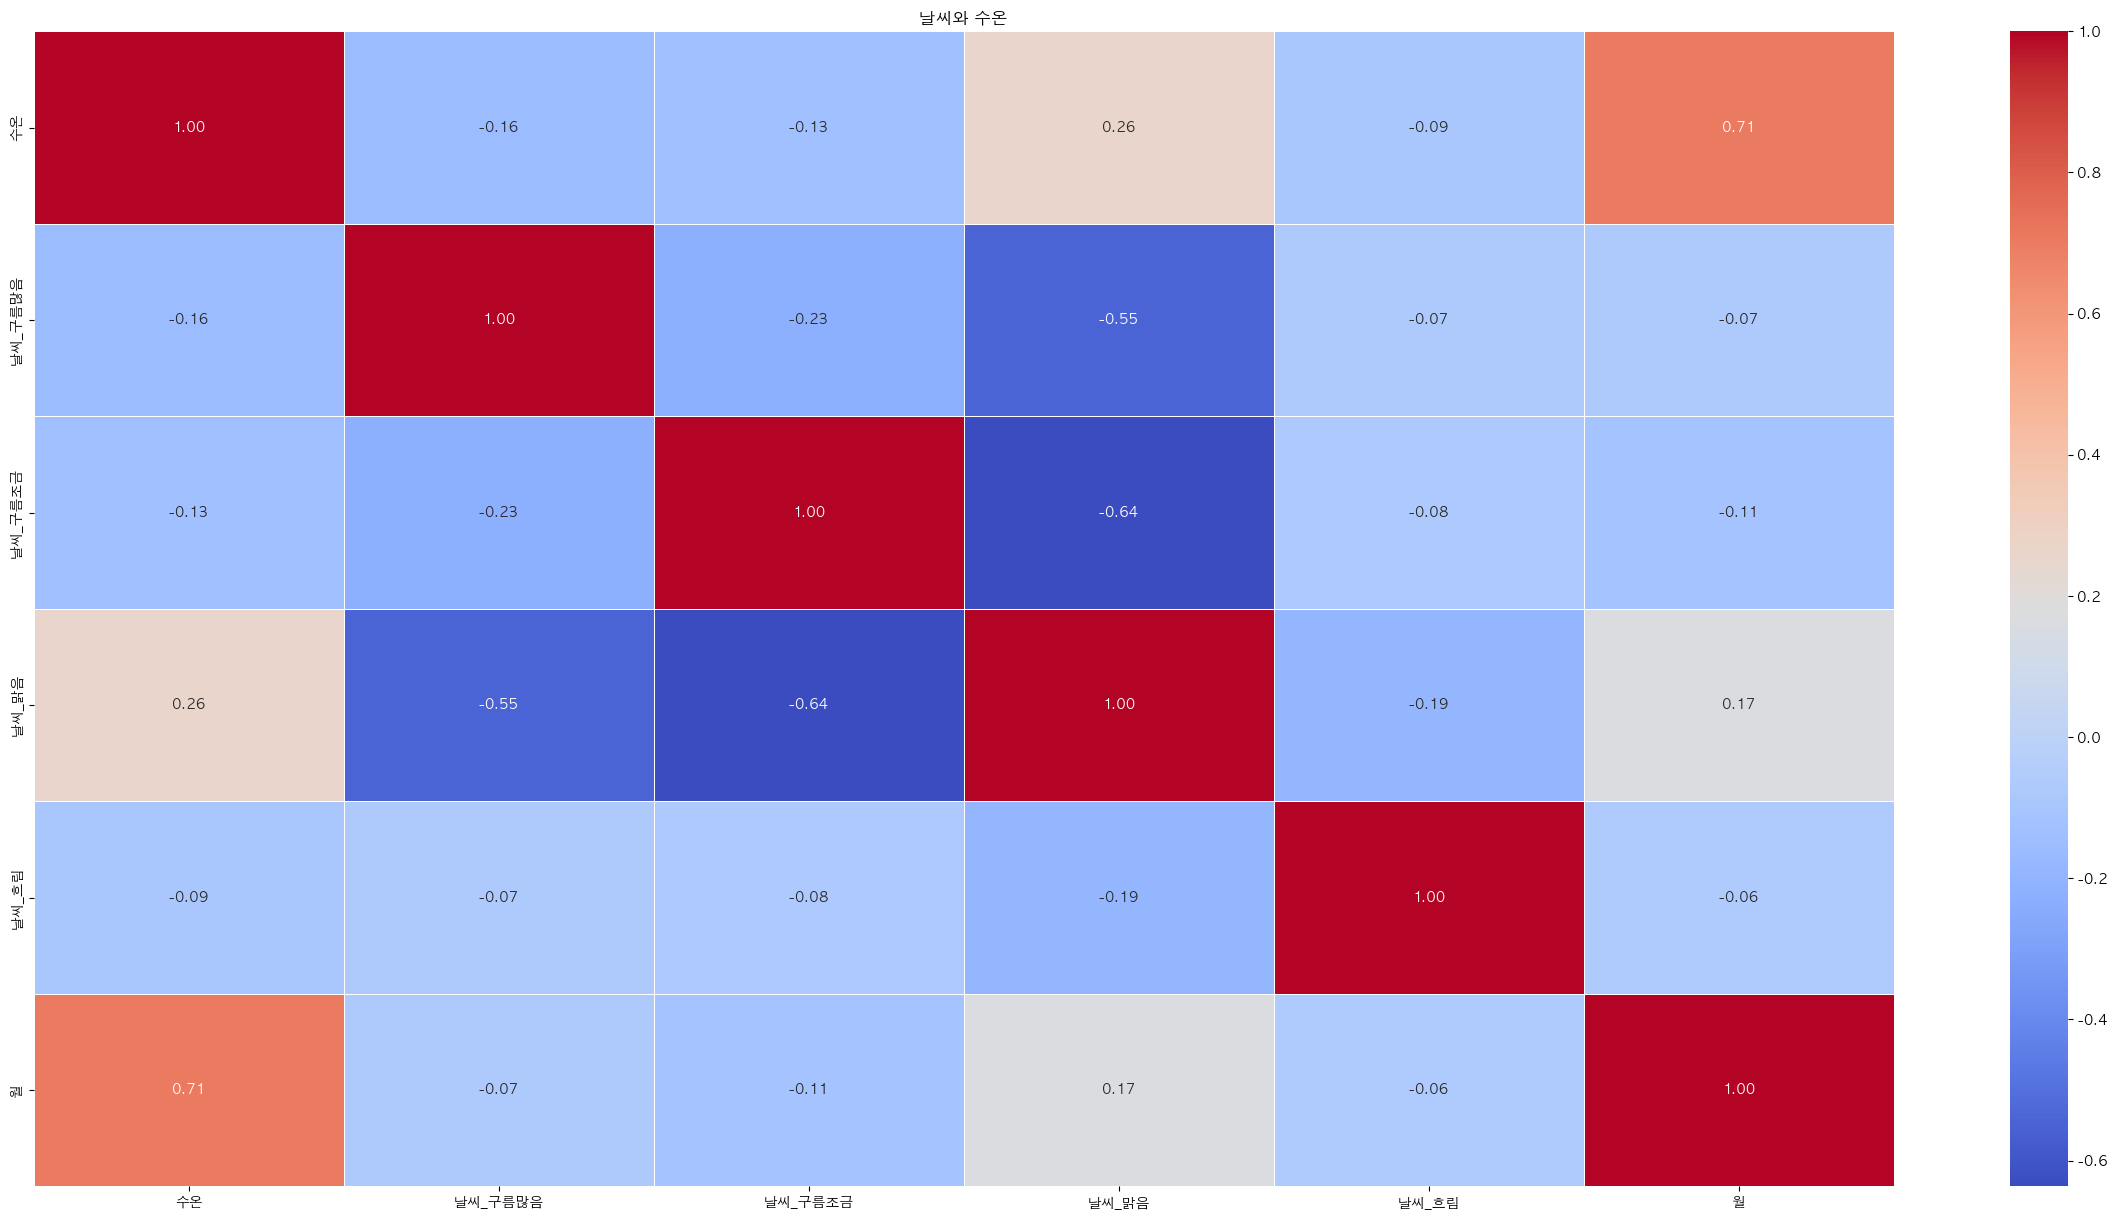

In [54]:
plt.figure(figsize=(30, 15))
sns.heatmap(tempcorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('날씨와 수온')
plt.show()

In [55]:
che = hanlim.drop(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [56]:
checorrs = che.corr()

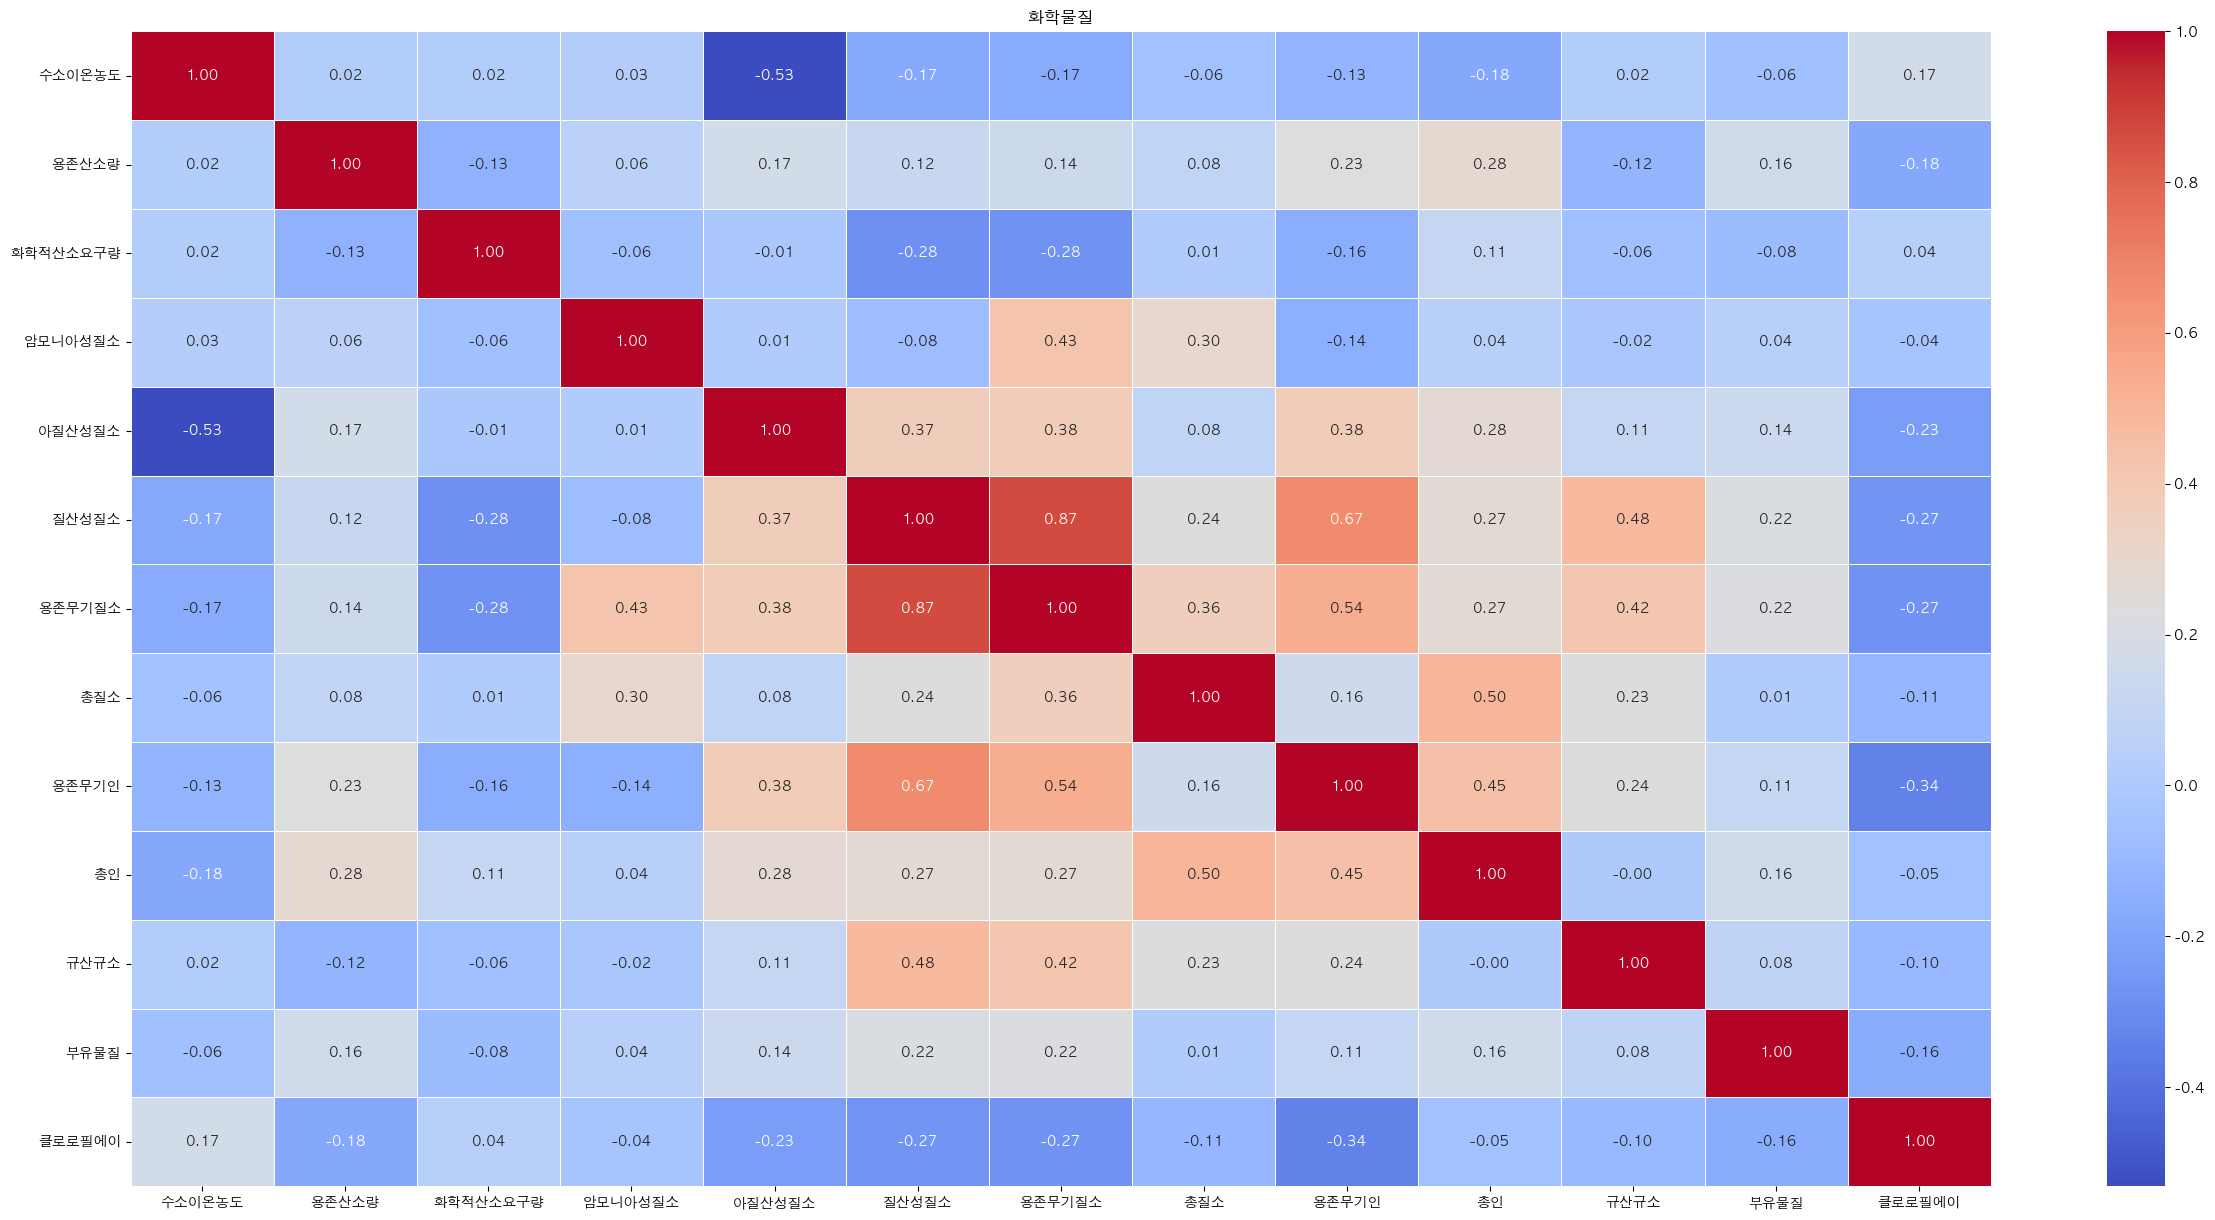

In [57]:
plt.figure(figsize=(30, 15))
sns.heatmap(checorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

In [58]:
che2 = hanlim.drop(['측정 일자', '수심', '투명도', '수질등급', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [59]:
che2corrs = che2.corr()

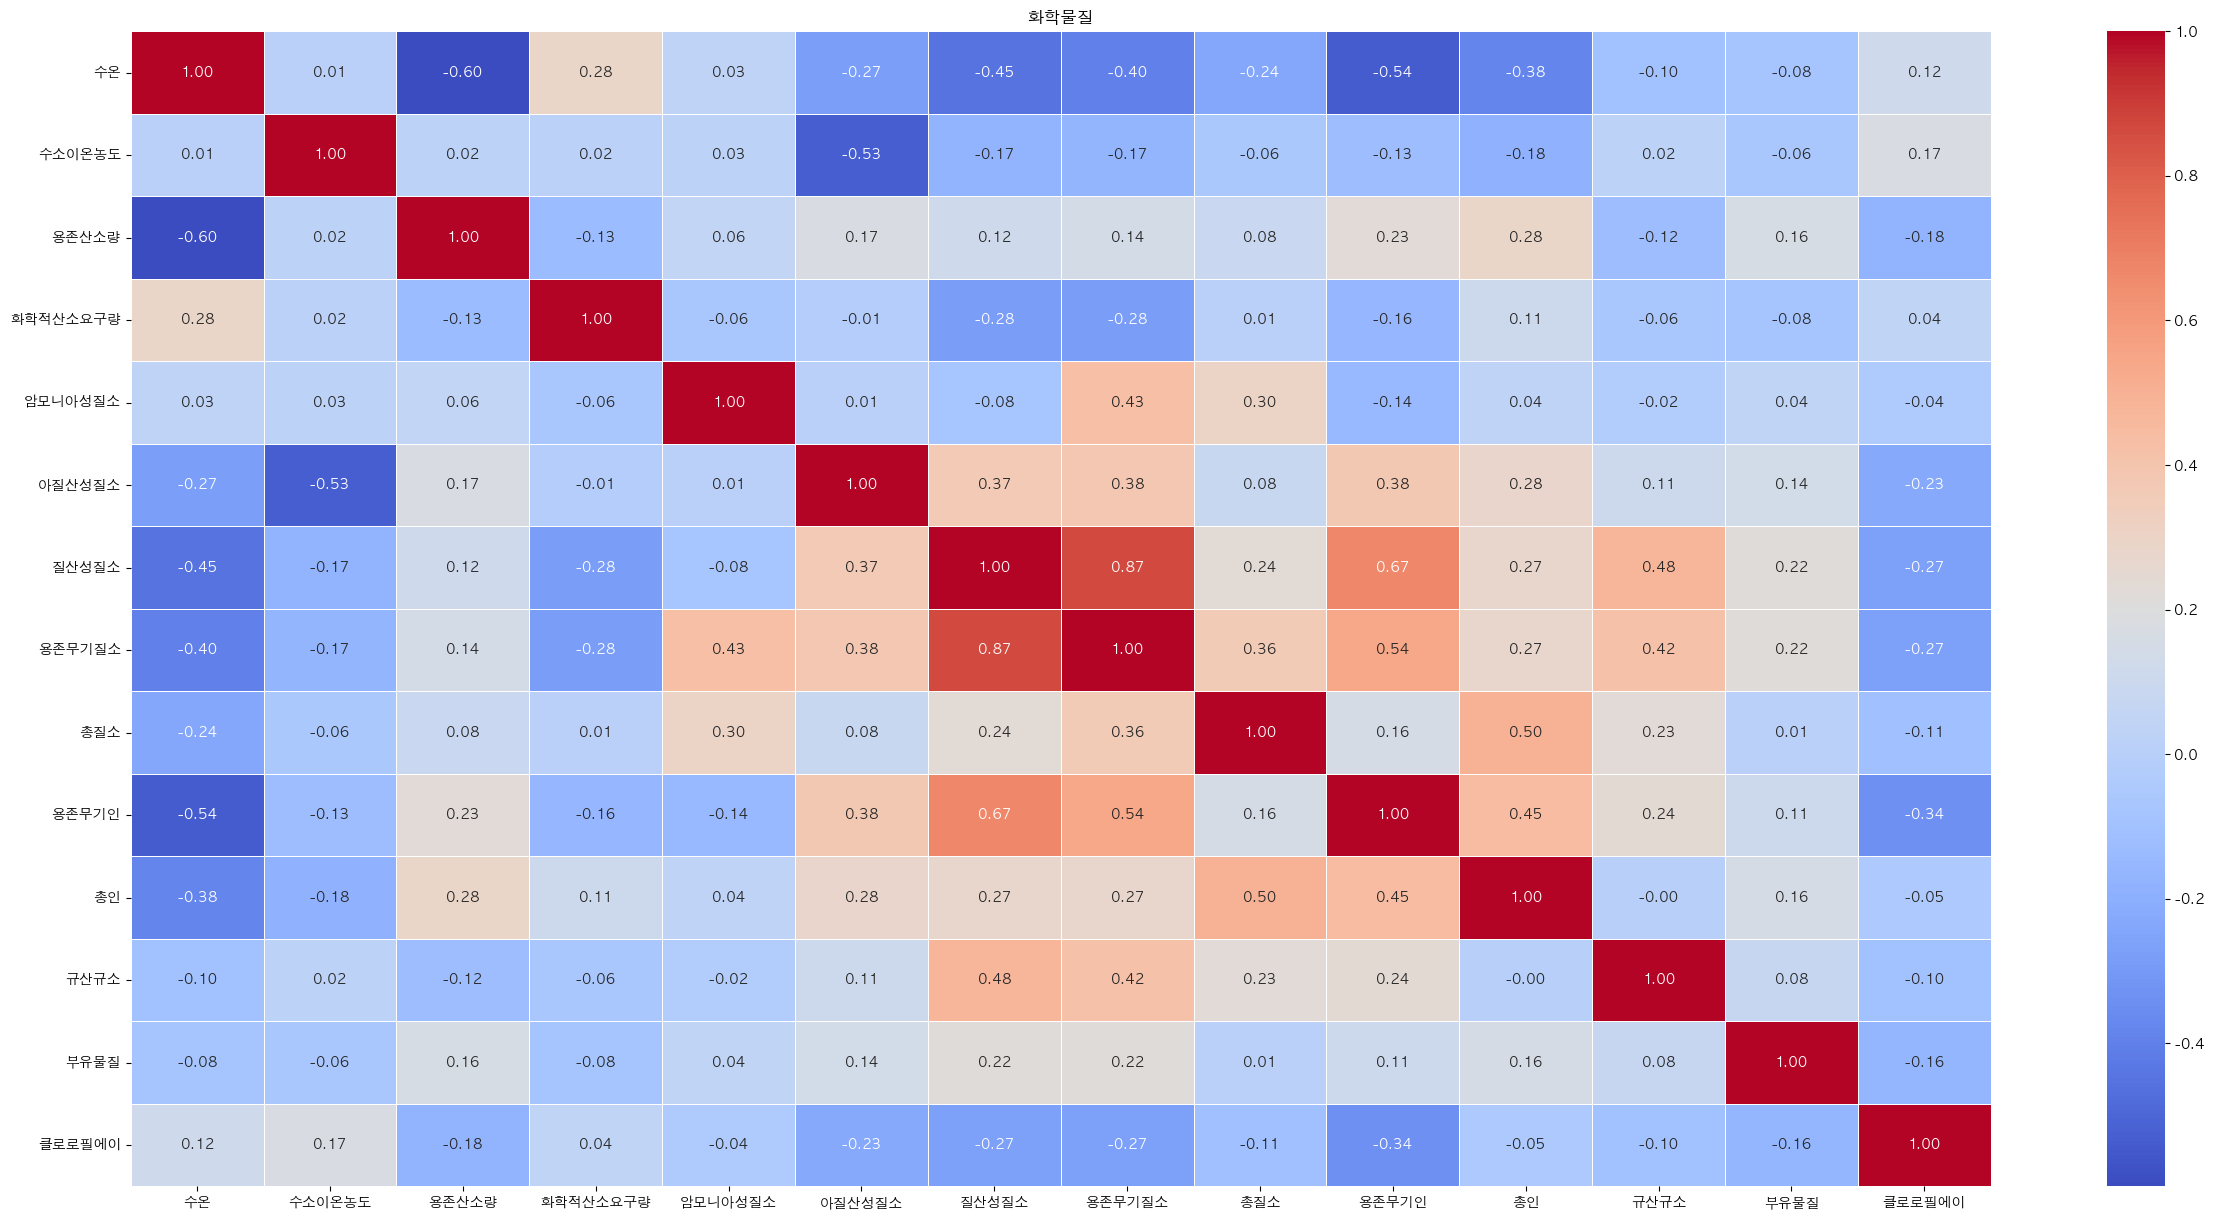

In [60]:
plt.figure(figsize=(30, 15))
sns.heatmap(che2corrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/2594024320.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/2594024320.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/2594024320.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/2594024320.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/2594024320.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/2594024320.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758

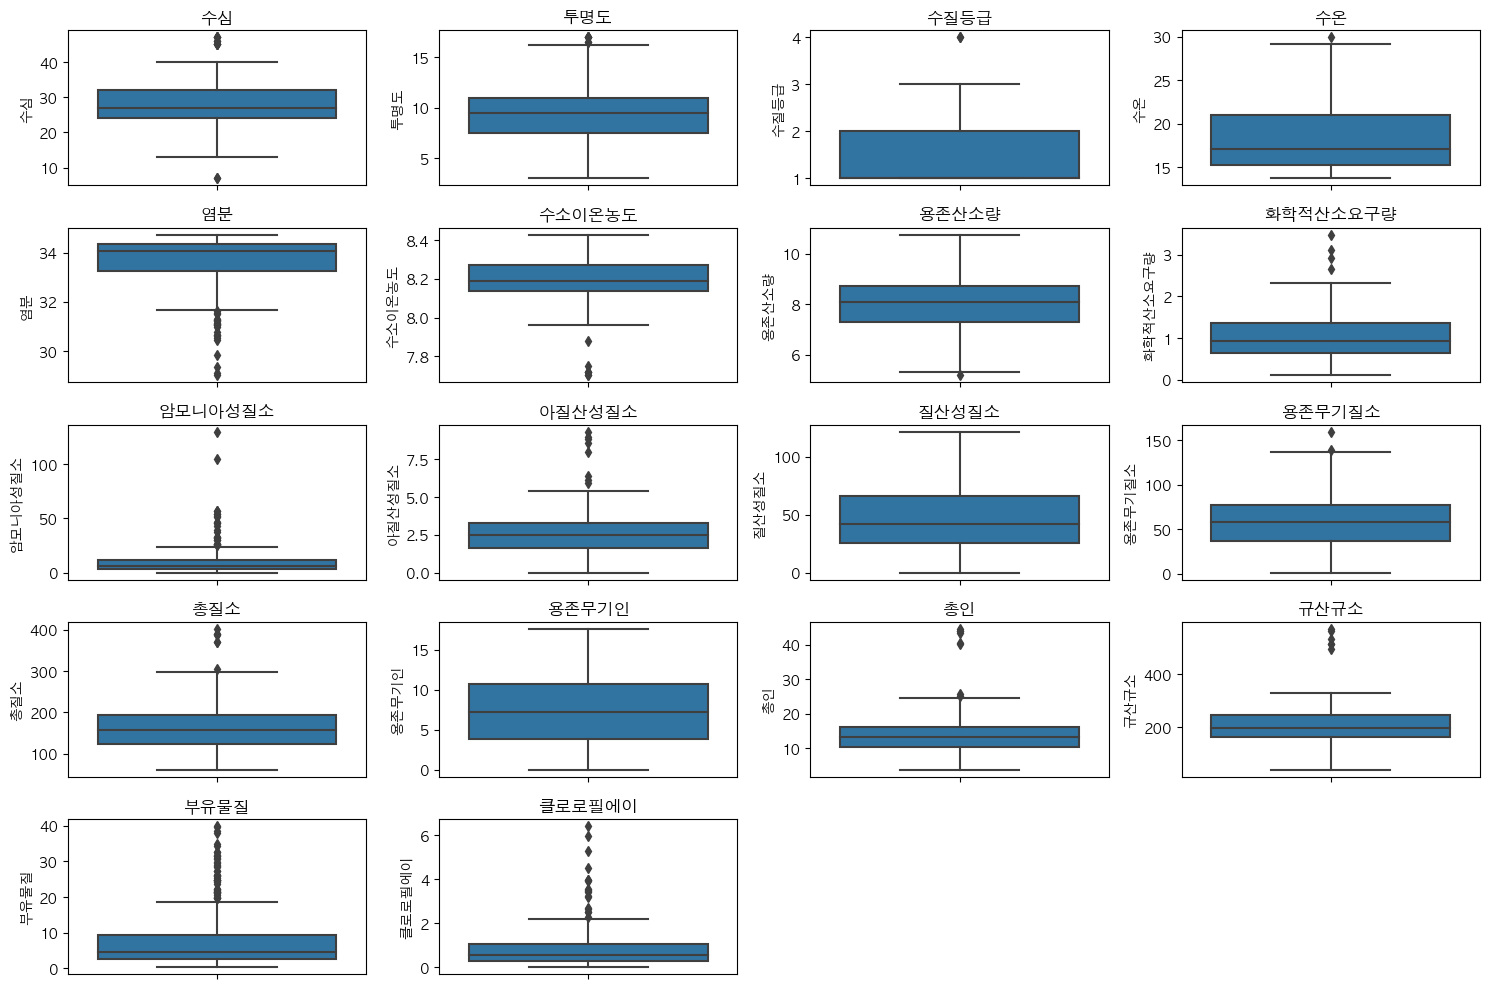

In [61]:
columns = ['수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.boxplot(y=hanlim[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/723701394.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/723701394.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/723701394.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/723701394.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/723701394.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/723701394.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/723701394.p

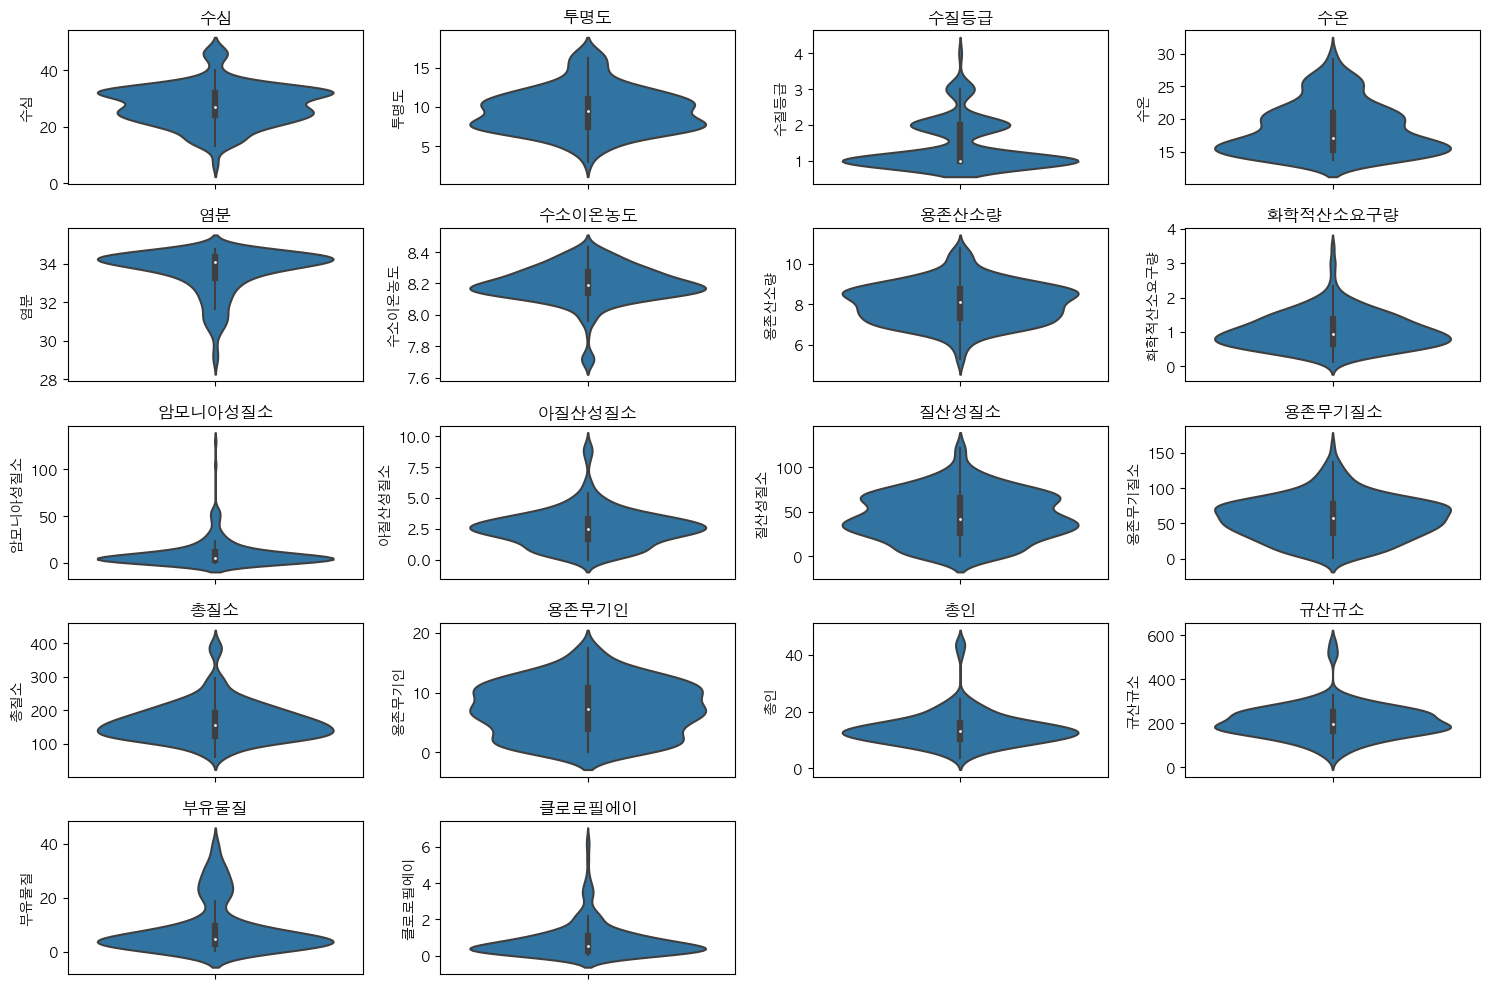

In [62]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.violinplot(y=hanlim[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/3035089389.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/3035089389.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/3035089389.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/3035089389.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/3035089389.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/3035089389.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_82758/30350

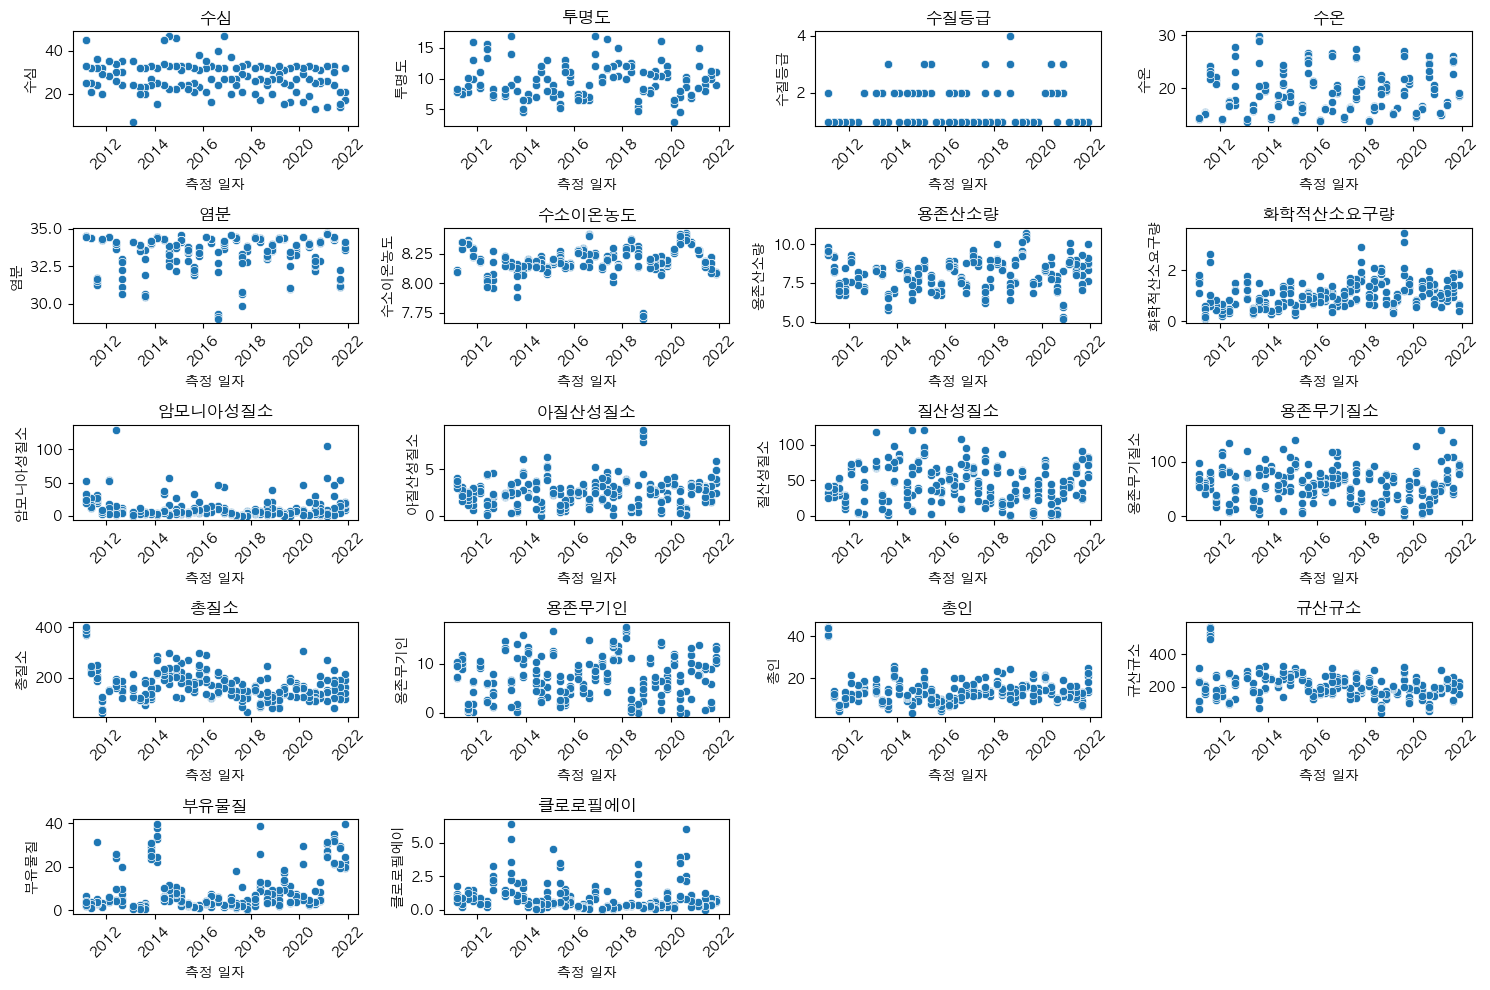

In [63]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.scatterplot(data=hanlim, x='측정 일자', y=column)
    plt.title(column)
    plt.xticks(rotation=45) 
    plt.tight_layout()

plt.show()

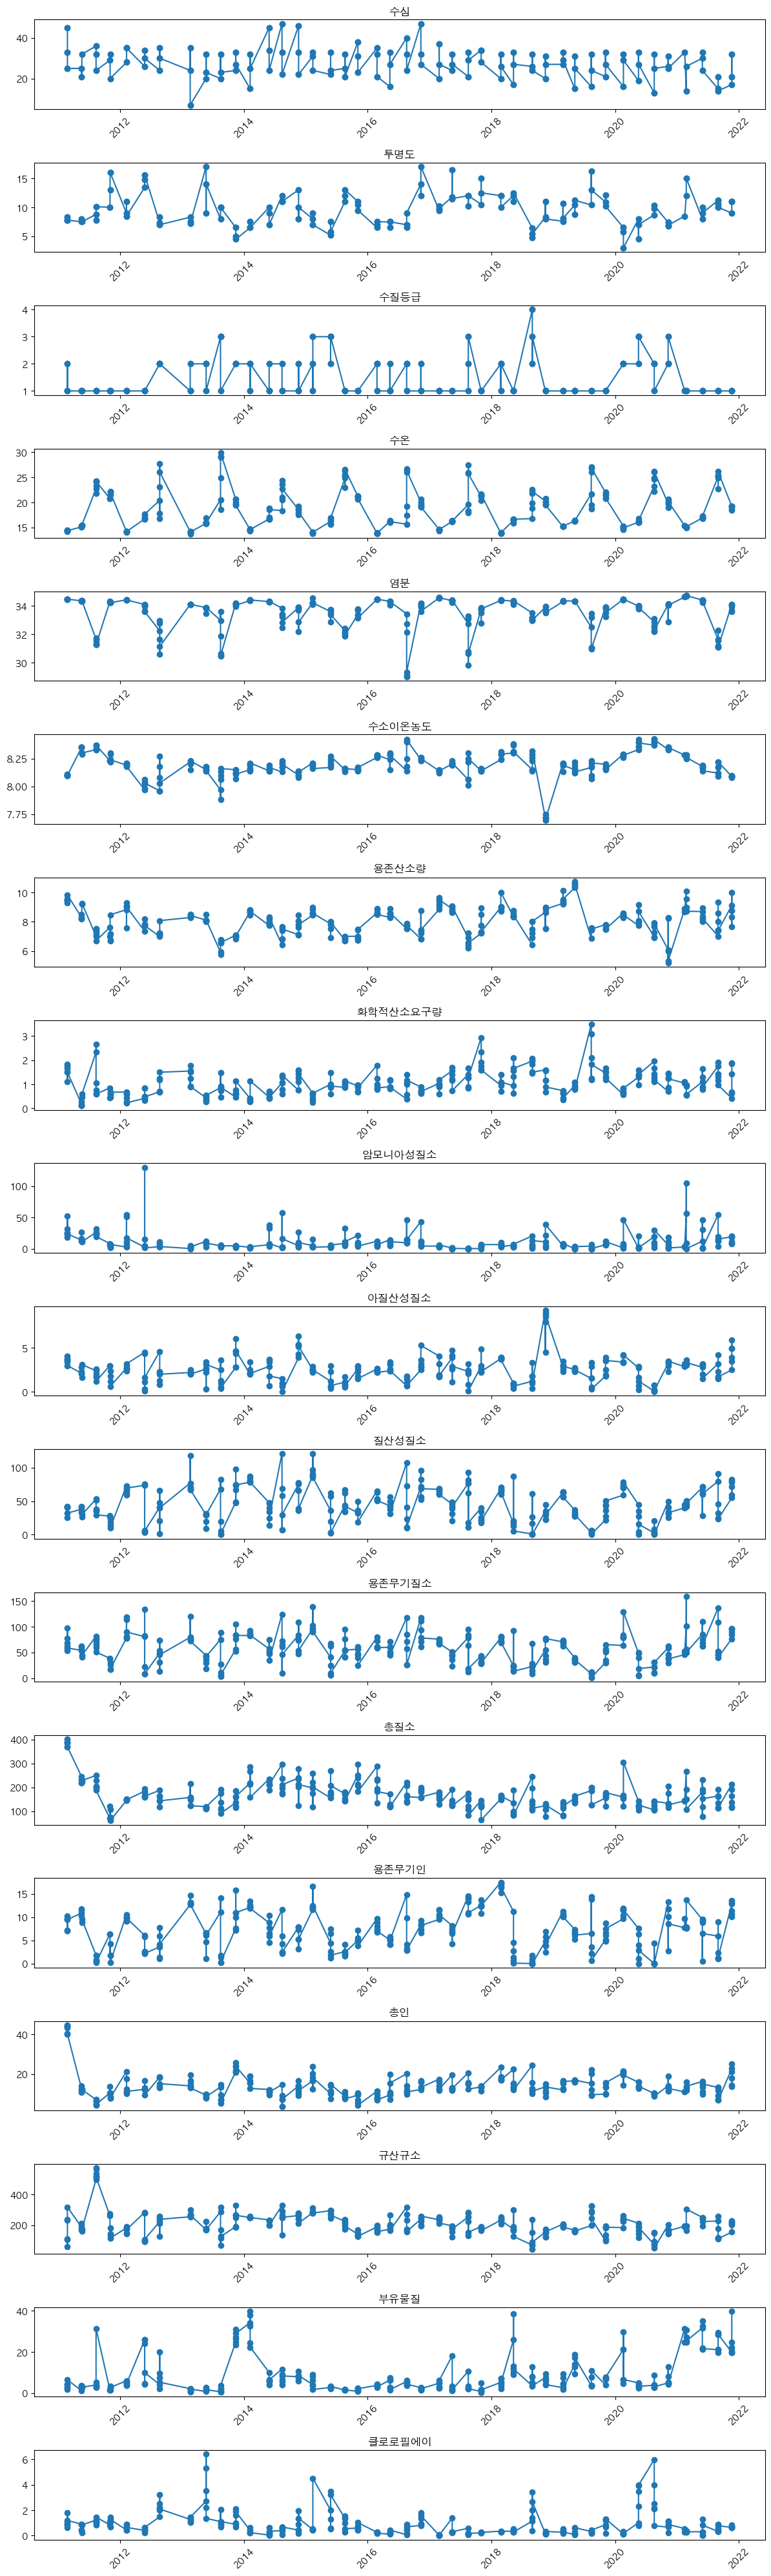

In [64]:
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 40))

for i, column in enumerate(columns):
    axes[i].plot(hanlim['측정 일자'], hanlim[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


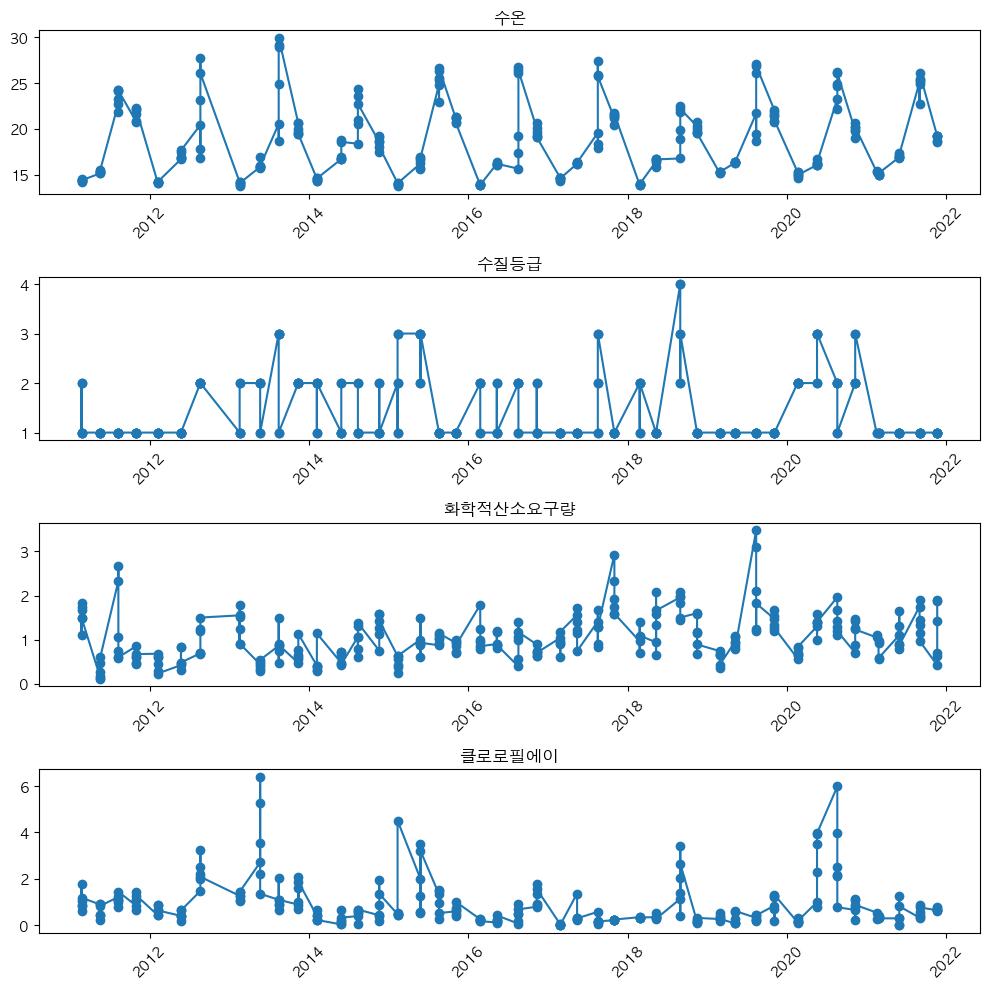

In [66]:
new_col = ['수온','수질등급', '화학적산소요구량','클로로필에이']
fig, axes = plt.subplots(len(new_col), 1, figsize=(10, 10))

for i, column in enumerate(new_col):
    axes[i].plot(hanlim['측정 일자'], hanlim[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features_for_standardization = hanlim.drop(['측정 일자','년','월','일'], axis=1).select_dtypes(include=['float64', 'int64'])

standardized_features = scaler.fit_transform(numerical_features_for_standardization)

standardized_features_df = pd.DataFrame(standardized_features, columns=numerical_features_for_standardization.columns)

hanlim = pd.concat([hanlim['측정 일자'], standardized_features_df], axis=1)

hanlim.head()


,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,총인,규산규소,부유물질,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층
6,2021-11-20,-1.917715,0.143619,-0.67098,1.950752,-2.212937,0.235265,-0.674555,-0.132363,0.344672,...,-1.169586,-1.260573,2.132865,-0.100111,-0.440959,-0.514496,0.808608,-0.154303,-1.0,1.0
7,2021-11-20,-0.938249,0.357389,-0.67098,1.762842,-2.204117,0.235265,1.281689,0.232361,0.092959,...,-0.803589,-1.229859,2.234575,-0.284237,-0.440959,-0.514496,0.808608,-0.154303,-1.0,1.0
8,2021-11-20,-1.777791,0.571160,-0.67098,1.734526,-2.107087,-0.179908,0.545577,0.539497,0.589581,...,-1.074038,-1.160042,2.111452,-0.539966,-0.440959,-0.514496,0.808608,-0.154303,-1.0,1.0
15,2021-11-20,-0.518477,-0.212666,-0.67098,-0.422584,0.680299,-0.262943,0.111976,-0.477892,-0.594148,...,0.025572,0.480851,2.812719,-0.867300,-0.440959,-0.514496,0.808608,-0.154303,1.0,-1.0
16,2021-11-20,0.740837,0.143619,-0.67098,-0.438029,0.715582,-0.096874,-0.049363,-0.266735,2.426402,...,-0.071595,0.455041,2.566472,-0.867300,-0.440959,-0.514496,0.808608,-0.154303,1.0,-1.0


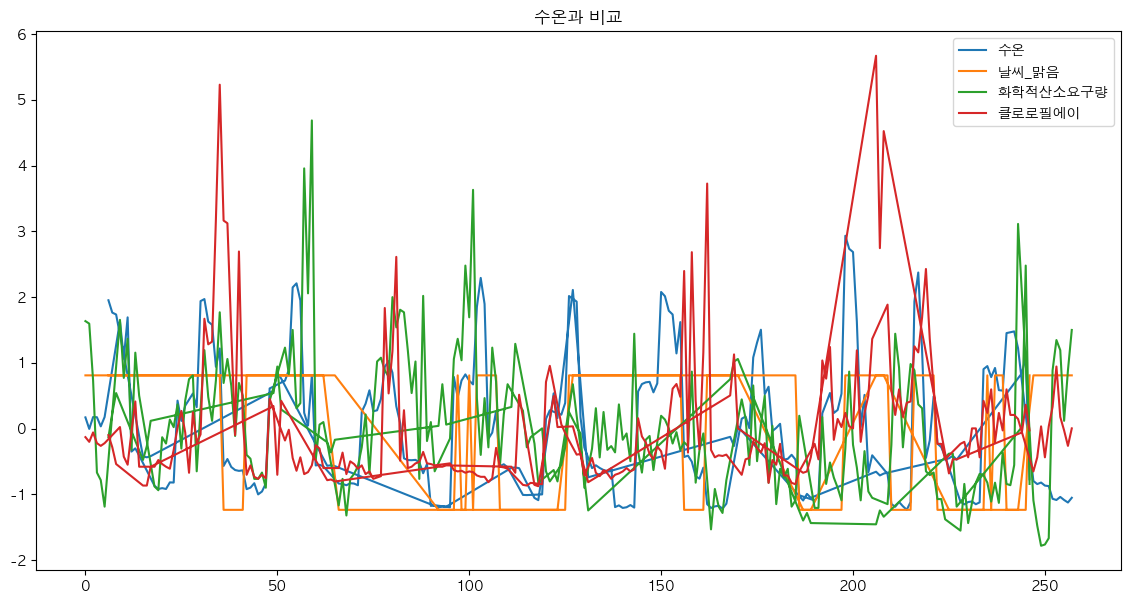

In [72]:
plt.figure(figsize=(14, 7))
plt.plot(hanlim['수온'], label='수온')
plt.plot(hanlim['날씨_맑음'], label='날씨_맑음')
plt.plot(hanlim['화학적산소요구량'], label='화학적산소요구량')
plt.plot(hanlim['클로로필에이'], label='클로로필에이')

plt.title('수온과 비교')

plt.legend()
plt.show()

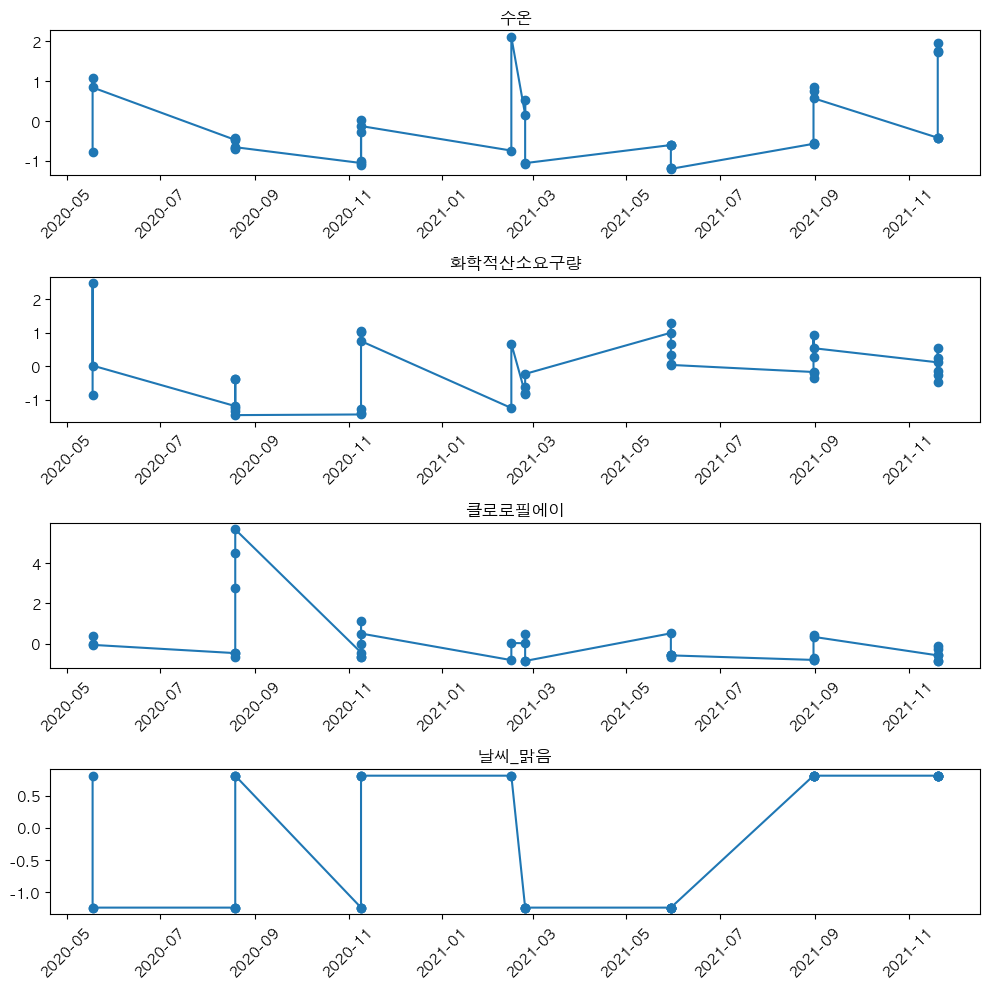

In [73]:
new_col = ['수온', '화학적산소요구량','클로로필에이','날씨_맑음']
fig, axes = plt.subplots(len(new_col), 1, figsize=(10, 10))

for i, column in enumerate(new_col):
    axes[i].plot(hanlim['측정 일자'], hanlim[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
